# Análise de um oscilador com *N* graus de liberdade sujeito a uma excitação dinâmica aplicada nalguns graus de liberdade

## Formulação do problema

Equação de equilíbrio dinâmico em coordenadas reais de um oscilador com *N* graus de liberdade sujeito a uma excitação dinâmica:

$$[M] \times \{\ddot u\} + [C] \times \{\dot u\} + [K] \times \{u\} = \{s\} \cdot p(t)$$

O vetor $\{s\}$ contém a descrição espacial da excitação cuja variação ao longo do tempo é definida através do termo $p(t)$. Admite-se no presente caso, sem perda de generalidade, que a excitação é uma função harmónica ($p(t) = \sin (\omega \cdot t)$).

Adotando a seguinte transformação de coordenadas reais em coordenadas modais:

$$\{u\} = [\Phi] \times \{q\} = \sum_{n=1}^{N} \{\phi_n\} \cdot q_n$$

é possível converter *N* equações de equilíbrio dinâmico para coordenadas modais. Para o modo *n* obtém-se:

$$M_n \cdot \{\ddot q_n\} + C_n \cdot \{\dot q_n\} + K_n \cdot \{q_n\} = \{\phi_n\}^T \times \{s\} \cdot p(t)$$

em que:

$M_n = \{\phi_n\}^T \times [M] \times \{\phi_n\}$ - Massa modal

$C_n = \{\phi_n\}^T \times [C] \times \{\phi_n\} = 2 \cdot \zeta_n \cdot M_n \cdot \omega_n$ - Amortecimento modal clássico

$K_n = \{\phi_n\}^T \times [K] \times \{\phi_n\}$ - Rigidez modal

$\zeta_n$ é o coeficiente de amortecimento modal e $\omega_n$ é a frequência de vibração modal.

## Solução claśsica

Expansão modal do vetor de excitação:

$$\{s\} = \sum_{n=1}^{N} \{s_n\} = \sum_{n=1}^{N} \Gamma_n \cdot [M] \times \{\phi_n\}$$

em que $\Gamma_n$ é o fator de participação do modo *n* dado por:

$$\Gamma_n = \frac{\{\phi_n\}^T \times \{s\}}{M_n}$$

A equação de equilíbrio dinâmico em coordenadas modais passa a escrever-se:

$$\ddot q_n + 2 \cdot \zeta_n \cdot \omega_n \cdot \dot q_n + \omega_n^2 \cdot q_n = \Gamma_n \cdot p(t)$$

Para a excitação harmónica acima definida, a resposta modal em regime estacionário é dada por:

$$q_n(t) = \frac{\Gamma_n}{K_n} \cdot \frac{(1 - \beta_n^2) \cdot \sin (\omega \cdot t) - 2 \cdot \zeta_n \cdot \beta_n \cdot \cos (\omega \cdot t)}{(1- \beta_n^2)^2 + (2 \cdot \zeta_n \cdot \beta_n)^2}$$

em que $\beta_n = \frac{\omega}{\omega_n}$. A resposta em deslocamento do oscilador nas coordenadas reais é dada por:

$$\{u(t)\} = [\Phi] \times \{q(t)\} = \sum_{n=1}^{N} \{\phi_n\} \cdot q_n(t)$$

## Solução alternativa

A excitação aplicada produz deslocamentos estáticos dados por:

$$\{u_{st}\} = [K^{-1}] \times \{s\}$$

Realizando a expansão modal deste vetor de deslocamentos, obtêm-se as coordenadas modais estáticas correspondentes:

$$q_{n,st} = \frac{\{\phi_n\}^T \times [M] \times \{u_{st}\}}{M_n}$$

As respostas modais são então dadas por:

$$q_n(t) = q_{n,st} \cdot \frac{(1 - \beta_n^2) \cdot \sin (\omega \cdot t) - 2 \cdot \zeta_n \cdot \beta_n \cdot \cos (\omega \cdot t)}{(1- \beta_n^2)^2 + (2 \cdot \zeta_n \cdot \beta_n)^2}$$

e a resposta em deslocamento do oscilador nas coordenadas reais, à semelhança do caso anterior, é dada por:

$$\{u\} = [\Phi] \times \{q(t)\} = \sum_{n=1}^{N} \{\phi_n\} \cdot q_n(t)$$

## Comparação de soluções

Conforme se observa, as duas soluções diferem apenas no termo multiplicativo da resposta modal pelo que serão equivalentes se e só se:

$$\frac{\{\phi_n\}^T \times \{s\}}{M_n \cdot K_n} = \frac{\{\phi_n\}^T \times [M] \times [K^{-1}] \times \{s\}}{M_n}$$

Eliminando os fatores comuns, tem-se:

$$\frac{1}{K_n} = [M] \times [K^{-1}]$$
$$\frac{1}{K_n} \cdot [K] = [M]$$

Pré-multiplicando por $\{\phi_n\}^T$ e pós-multiplicando por $\{\phi_n\}$ ambos os lados da igualdade:

$$\frac{1}{K_n} \cdot \{\phi_n\}^T \times [K] \times \{\phi_n\} = \{\phi_n\}^T \times [M] \times \{\phi_n\}$$
$$\frac{K_n}{K_n} = M_n$$
$$1 = M_n$$

Conclui-se assim que as duas soluções serão equivalentes se os modos de vibração forem normalizados relativamente à massa. Este é um aspeto que habitualmente não é tratado nos livros de texto.

# Exemplo de aplicação

## Laboratório computacional

In [1]:
import sys
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('System: {}'.format(sys.version))
for package in (np, mpl):
    print('Package: {} {}'.format(package.__name__, package.__version__))

System: 3.5.1 |Anaconda 4.0.0 (32-bit)| (default, Dec  7 2015, 11:17:45) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Package: numpy 1.10.4
Package: matplotlib 1.5.1


## Dados

Oscilador com três graus de liberdade:

In [2]:
MM = np.matrix(np.diag([1.,2.,3.]))
KK = np.matrix([[2,-1,0],[-1,2,-1],[0,-1,1]])*1000.
print(MM)
print(KK)

[[ 1.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  3.]]
[[ 2000. -1000.     0.]
 [-1000.  2000. -1000.]
 [    0. -1000.  1000.]]


Análise modal:

In [3]:
W2, F1 = np.linalg.eig(KK.I@MM)
print(W2)
print(F1)

[ 0.0124298   0.00041949  0.00115071]
[[-0.30032942 -0.93200311 -0.6003697 ]
 [-0.5764968   0.35775412 -0.67900226]
 [-0.75990373 -0.0581566   0.422507  ]]


Ordenação dos modos:

In [4]:
ix = np.argsort(W2)[::-1]
W2 = 1./W2[ix]
F1 = F1[:,ix]
Wn = np.sqrt(W2)
print(W2)
print(Wn)
print(F1)

[   80.45182758   869.02643341  2383.85507234]
[  8.96949428  29.47925429  48.82473832]
[[-0.30032942 -0.6003697  -0.93200311]
 [-0.5764968  -0.67900226  0.35775412]
 [-0.75990373  0.422507   -0.0581566 ]]


Normalização dos modos de vibração relativamente à matriz de massa:

In [5]:
Fn = F1/np.sqrt(np.diag(F1.T@MM@F1))
print(Fn)

[[-0.190431   -0.44525997 -0.87491691]
 [-0.36554148 -0.50357726  0.33584129]
 [-0.481835    0.31334935 -0.05459445]]


Massa e rigidez modais:

In [6]:
Mn = np.diag(Fn.T@MM@Fn)
Kn = np.diag(Fn.T@KK@Fn)
print(Mn)
print(Kn)

[ 1.  1.  1.]
[   80.45182758   869.02643341  2383.85507234]


Excitação dinâmica:

In [7]:
sp = np.matrix([[0.], [1.], [0.]])
wp = 2.*np.pi*4.
print(sp)
print(wp)

[[ 0.]
 [ 1.]
 [ 0.]]
25.132741228718345


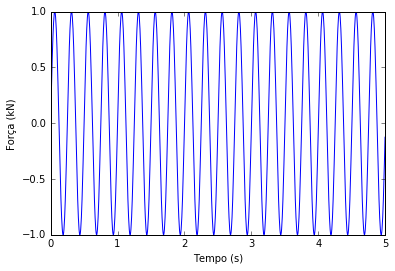

In [8]:
tt = np.arange(1000)*0.005
pt = np.sin(wp*tt)
plt.figure()
plt.plot(tt, pt)
plt.xlabel('Tempo (s)')
plt.ylabel('Força (kN)')
plt.show()

Função auxiliar para o cálculo da resposta modal:

In [9]:
def qn(amplitude, wp, beta, zn, tt):
    """Calcula a resposta modal do modo n."""
    qn_t = amplitude * ((1.-beta**2)*np.sin(wp*tt)-2.*zn*beta*np.cos(wp*tt))/((1.-beta**2)**2+(2.*zn*beta)**2)
    return qn_t

## Solução clássica

In [10]:
Gn = np.diag(1./Mn)@Fn.T@sp
print(Gn)

[[-0.36554148]
 [-0.50357726]
 [ 0.33584129]]


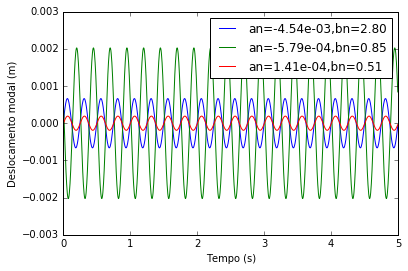

In [11]:
qn_t = []
plt.figure()
for n in range(3):
    an = Gn[n]/Kn[n]
    bn = wp/Wn[n]
    q = qn(an[0,0], wp, bn, 0.05, tt)
    qn_t.append(q)
    plt.plot(tt, q, label='an={:.2e},bn={:.2f}'.format(an[0,0], bn))
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento modal (m)')
plt.show()

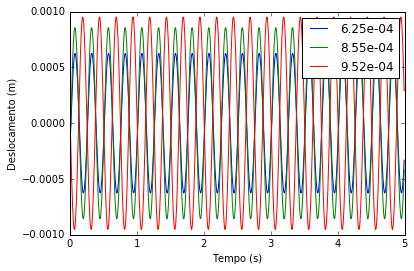

In [12]:
plt.figure()
u_t = Fn@qn_t
for n in range(3):
    plt.plot(tt, u_t[n].T, label='{:.2e}'.format(np.max(u_t[n])))
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento (m)')
plt.show()

## Solução alternativa

In [13]:
ust = KK.I@sp
print(ust)

[[ 0.001]
 [ 0.002]
 [ 0.002]]


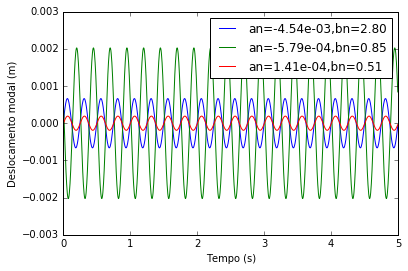

In [14]:
qn_st_t = []
plt.figure()
for n in range(3):
    an = Fn.T[n]@MM@ust/Mn[n]
    bn = wp/Wn[n]
    qst = qn(an[0,0], wp, bn, 0.05, tt)
    qn_st_t.append(qst)
    plt.plot(tt, qst, label='an={:.2e},bn={:.2f}'.format(an[0,0], bn))
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento modal (m)')
plt.show()

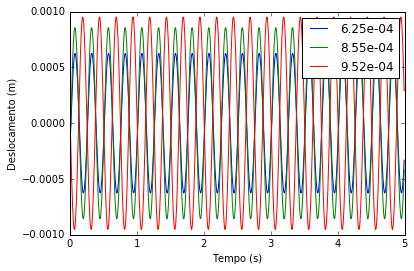

In [15]:
plt.figure()
u_t = Fn@qn_st_t
for n in range(3):
    plt.plot(tt, u_t[n].T, label='{:.2e}'.format(np.max(u_t[n])))
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento (m)')
plt.show()

Conforme se pode observar, obteve-se a mesma solução pela via clássica e pela via alternativa.

Este documento foi elaborado por Paulo Xavier Candeias.